In [1]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar archivos csv
brawlerStats = pd.read_csv('datasets/brawlers/brawlers_stats.csv', index_col=0)

crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)

C:\Users\alniquia\AppData\Local\Temp\ipykernel_3560\1914638589.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)


In [3]:
# merge cada brawler con la base final

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player1.brawler.'), how='left', left_on='battle.team1.player1.brawler.id', right_on='battle.team1.player1.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player2.brawler.'), how='left', left_on='battle.team1.player2.brawler.id', right_on='battle.team1.player2.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player3.brawler.'), how='left', left_on='battle.team1.player3.brawler.id', right_on='battle.team1.player3.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player1.brawler.'), how='left', left_on='battle.team2.player1.brawler.id', right_on='battle.team2.player1.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player2.brawler.'), how='left', left_on='battle.team2.player2.brawler.id', right_on='battle.team2.player2.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player3.brawler.'), how='left', left_on='battle.team2.player3.brawler.id', right_on='battle.team2.player3.brawler.id')

crossBattlelog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27840 entries, 0 to 27839
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playertag                              27840 non-null  object 
 1   battle_time                            27840 non-null  object 
 2   event.id                               27840 non-null  int64  
 3   event.mode                             26362 non-null  object 
 4   event.map                              27840 non-null  object 
 5   battle.mode                            27840 non-null  object 
 6   battle.type                            27840 non-null  object 
 7   battle.result                          27840 non-null  object 
 8   battle.duration                        27840 non-null  float64
 9   battle.trophy_change                   18907 non-null  float64
 10  battle.star_player.tag                 23328 non-null  object 
 11  ba

In [4]:
# crear columna teamcomp
def create_list(row, team):
    return [row['battle.' + team + '.player1.brawler.role'], row['battle.' + team + '.player2.brawler.role'], row['battle.' + team + '.player3.brawler.role']]

crossBattlelog['battle.team1.comp'] = crossBattlelog.apply(lambda row: create_list(row, 'team1'), axis=1)

crossBattlelog['battle.team2.comp'] = crossBattlelog.apply(lambda row: create_list(row, 'team2'), axis=1)

crossBattlelog[['battle.team1.comp','battle.team2.comp']]

,battle.team1.comp,battle.team2.comp
0,"[tank stopper, assassin, close quarters]","[sniper, tank, assassin]"
1,"[close quarters, tank stopper, healer]","[area control, area control, tank stopper]"
2,"[assassin, tank, tank]","[tank stopper, close quarters, assassin]"
3,"[assassin, assassin, area control]","[close quarters, assassin, tank stopper]"
4,"[tank stopper, close quarters, assassin]","[sniper, tank, assassin]"
...,...,...
27835,"[area control, assassin, area control]","[assassin, tank, sniper]"
27836,"[close quarters, healer, ranged dps]","[area control, close quarters, ranged dps]"
27837,"[area control, assassin, ranged dps]","[area control, area control, assassin]"
27838,"[area control, ranged dps, sniper]","[healer, area control, assassin]"


In [5]:
# crear columna teambrawlers
def create_list(row, team):
    return [row['battle.' + team + '.player1.brawler.name'], row['battle.' + team + '.player2.brawler.name'], row['battle.' + team + '.player3.brawler.name']]

crossBattlelog['battle.team1.brawlers'] = crossBattlelog.apply(lambda row: create_list(row, 'team1'), axis=1)

crossBattlelog['battle.team2.brawlers'] = crossBattlelog.apply(lambda row: create_list(row, 'team2'), axis=1)

crossBattlelog[['battle.team1.brawlers','battle.team2.brawlers']]

,battle.team1.brawlers,battle.team2.brawlers
0,"[SHELLY, MAX, EL PRIMO]","[BEA, ASH, CHESTER]"
1,"[EL PRIMO, SHELLY, POCO]","[JESSIE, NITA, SHELLY]"
2,"[COLETTE, FRANK, FRANK]","[SHELLY, EL PRIMO, MAX]"
3,"[OTIS, DARRYL, SQUEAK]","[EL PRIMO, MAX, SHELLY]"
4,"[SHELLY, EL PRIMO, MAX]","[BEA, JACKY, CHESTER]"
...,...,...
27835,"[BIBI, COLETTE, CROW]","[STU, ASH, BEA]"
27836,"[EDGAR, POCO, SPIKE]","[LOU, BULL, LOLA]"
27837,"[GENE, SURGE, SPIKE]","[JESSIE, CROW, CHESTER]"
27838,"[BO, LOLA, BROCK]","[GUS, BUSTER, CHESTER]"


In [6]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team2    14006
team1    13834
Name: player_team, dtype: int64

In [7]:
# crear columna teamrange
def create_list(row, team):
    return [row['battle.' + team + '.player1.brawler.range'], row['battle.' + team + '.player2.brawler.range'], row['battle.' + team + '.player3.brawler.range']]

crossBattlelog['battle.team1.range'] = crossBattlelog.apply(lambda row: create_list(row, 'team1'), axis=1)

crossBattlelog['battle.team2.range'] = crossBattlelog.apply(lambda row: create_list(row, 'team2'), axis=1)

crossBattlelog[['battle.team1.range','battle.team2.range']]

,battle.team1.range,battle.team2.range
0,"[long, normal, short]","[very long, short, long]"
1,"[short, long, long]","[long, short, long]"
2,"[long, normal, normal]","[long, short, normal]"
3,"[long, short, long]","[short, normal, long]"
4,"[long, short, normal]","[very long, short, long]"
...,...,...
27835,"[short, long, long]","[normal, short, very long]"
27836,"[short, long, long]","[long, short, long]"
27837,"[long, long, long]","[long, long, long]"
27838,"[long, long, long]","[long, normal, long]"


In [8]:
# ordena filas de teamcomp por nombre
crossBattlelog['battle.team1.comp'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team1.comp']]
crossBattlelog['battle.team2.comp'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team2.comp']]

crossBattlelog[['battle.team1.comp','battle.team2.comp']]

,battle.team1.comp,battle.team2.comp
0,"['assassin', 'close quarters', 'tank stopper']","['assassin', 'sniper', 'tank']"
1,"['close quarters', 'healer', 'tank stopper']","['area control', 'area control', 'tank stopper']"
2,"['assassin', 'tank', 'tank']","['assassin', 'close quarters', 'tank stopper']"
3,"['area control', 'assassin', 'assassin']","['assassin', 'close quarters', 'tank stopper']"
4,"['assassin', 'close quarters', 'tank stopper']","['assassin', 'sniper', 'tank']"
...,...,...
27835,"['area control', 'area control', 'assassin']","['assassin', 'sniper', 'tank']"
27836,"['close quarters', 'healer', 'ranged dps']","['area control', 'close quarters', 'ranged dps']"
27837,"['area control', 'assassin', 'ranged dps']","['area control', 'area control', 'assassin']"
27838,"['area control', 'ranged dps', 'sniper']","['area control', 'assassin', 'healer']"


In [9]:
# ordena filas de teambrawlers por nombre
crossBattlelog['battle.team1.brawlers'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team1.brawlers']]
crossBattlelog['battle.team2.brawlers'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team2.brawlers']]

crossBattlelog[['battle.team1.brawlers','battle.team2.brawlers']]

,battle.team1.brawlers,battle.team2.brawlers
0,"['EL PRIMO', 'MAX', 'SHELLY']","['ASH', 'BEA', 'CHESTER']"
1,"['EL PRIMO', 'POCO', 'SHELLY']","['JESSIE', 'NITA', 'SHELLY']"
2,"['COLETTE', 'FRANK', 'FRANK']","['EL PRIMO', 'MAX', 'SHELLY']"
3,"['DARRYL', 'OTIS', 'SQUEAK']","['EL PRIMO', 'MAX', 'SHELLY']"
4,"['EL PRIMO', 'MAX', 'SHELLY']","['BEA', 'CHESTER', 'JACKY']"
...,...,...
27835,"['BIBI', 'COLETTE', 'CROW']","['ASH', 'BEA', 'STU']"
27836,"['EDGAR', 'POCO', 'SPIKE']","['BULL', 'LOLA', 'LOU']"
27837,"['GENE', 'SPIKE', 'SURGE']","['CHESTER', 'CROW', 'JESSIE']"
27838,"['BO', 'BROCK', 'LOLA']","['BUSTER', 'CHESTER', 'GUS']"


In [10]:
# ordena filas de teamrange por nombre
crossBattlelog['battle.team1.range'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team1.range']]
crossBattlelog['battle.team2.range'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team2.range']]

crossBattlelog[['battle.team1.range','battle.team2.range']]

,battle.team1.range,battle.team2.range
0,"['long', 'normal', 'short']","['long', 'short', 'very long']"
1,"['long', 'long', 'short']","['long', 'long', 'short']"
2,"['long', 'normal', 'normal']","['long', 'normal', 'short']"
3,"['long', 'long', 'short']","['long', 'normal', 'short']"
4,"['long', 'normal', 'short']","['long', 'short', 'very long']"
...,...,...
27835,"['long', 'long', 'short']","['normal', 'short', 'very long']"
27836,"['long', 'long', 'short']","['long', 'long', 'short']"
27837,"['long', 'long', 'long']","['long', 'long', 'long']"
27838,"['long', 'long', 'long']","['long', 'long', 'normal']"


In [11]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    13882
team2    13826
draw       132
Name: winner_team, dtype: int64

In [12]:
# agregar columna identificando batallas levelup y definir subset
for i in range(len(crossBattlelog)):

	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

	if  (t1p1 <= 500 or t1p2 <= 500 or t1p3 <= 500 or t2p1 <= 500 or t2p2 <= 500 or t2p3 <= 500):
		crossBattlelog.loc[i, 'low_trophy'] = 'y'
	else:
		crossBattlelog.loc[i, 'low_trophy'] = 'n'

crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n']

crossBattlelog.shape

(18073, 88)

In [13]:
# unificar bases de teams
# renombrar columnas de crossBattlelog
bl1 = crossBattlelog.rename(columns={'battle.team1.comp': 'teamcomp', 'battle.team1.brawlers': 'teambrawlers','battle.team1.range': 'teamrange'})
bl2 = crossBattlelog.rename(columns={'battle.team2.comp': 'teamcomp', 'battle.team2.brawlers': 'teambrawlers','battle.team1.range': 'teamrange'})
bk1 = crossBattlelog.rename(columns={'battle.team1.player1.brawler.name': 'brawlername'})
bk2 = crossBattlelog.rename(columns={'battle.team1.player2.brawler.name': 'brawlername'})
bk3 = crossBattlelog.rename(columns={'battle.team1.player3.brawler.name': 'brawlername'})
bk4 = crossBattlelog.rename(columns={'battle.team2.player1.brawler.name': 'brawlername'})
bk5 = crossBattlelog.rename(columns={'battle.team2.player2.brawler.name': 'brawlername'})
bk6 = crossBattlelog.rename(columns={'battle.team2.player3.brawler.name': 'brawlername'})

# Concatenar DataFrames y renombrar columnas
teamComp = pd.concat([bl1[['playertag','player_team','teamcomp','winner_team']], bl2[['playertag','player_team','teamcomp','winner_team']]], ignore_index=True)

brawlerComp = pd.concat([bl1[['playertag','player_team','teambrawlers','winner_team']], bl2[['playertag','player_team','teambrawlers','winner_team']]], ignore_index=True)

brawler = pd.concat([
bk1[['playertag','player_team','brawlername','winner_team']], 
bk2[['playertag','player_team','brawlername','winner_team']], 
bk3[['playertag','player_team','brawlername','winner_team']], 
bk4[['playertag','player_team','brawlername','winner_team']], 
bk5[['playertag','player_team','brawlername','winner_team']], 
bk6[['playertag','player_team','brawlername','winner_team']]
], ignore_index=True)

teamRange = pd.concat([bl1[['playertag','player_team','teamrange','winner_team']], bl2[['playertag','player_team','teamrange','winner_team']]], ignore_index=True)

In [14]:
# crear pivot tables
pivotTeamComp = teamComp.pivot_table(index=['teamcomp','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

pivotBrawlerComp = brawlerComp.pivot_table(index=['teambrawlers','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

pivotBrawler = brawler.pivot_table(index=['brawlername','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

pivotRange = teamRange.pivot_table(index=['teamrange','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

In [15]:
# reset indexes
pivotTeamComp.reset_index(drop=False, inplace=True)
pivotBrawlerComp.reset_index(drop=False, inplace=True)
pivotBrawler.reset_index(drop=False, inplace=True)
pivotRange.reset_index(drop=False, inplace=True)

In [16]:
# agregar columna totales, win y draw
def add_total(df):

	df['total_games'] = df['draw'] + df['team1'] + df['team2']

	for i in range(len(df)):
		df.loc[i, 'total_draws'] = df.loc[i, 'draw']
		if df.loc[i, 'player_team'] == 'team1':
			df.loc[i, 'total_wins'] = df.loc[i, 'team1']
		elif df.loc[i, 'player_team'] == 'team2':
			df.loc[i, 'total_wins'] = df.loc[i, 'team2']
		else:
			print("error en el procedimiento")

add_total(pivotTeamComp)

add_total(pivotBrawlerComp)

add_total(pivotBrawler)

add_total(pivotRange)

In [17]:
# agrupar y calcular tasa de victoria team comp
def victory_rate(df, col):
	df = df[[col,'total_games','total_draws','total_wins']].groupby(col).sum()
	df['winrate'] = df['total_wins'] / df['total_games']
	return df

pivotTeamComp = victory_rate(pivotTeamComp, 'teamcomp')
pivotBrawlerComp = victory_rate(pivotBrawlerComp, 'teambrawlers')
pivotBrawler = victory_rate(pivotBrawler, 'brawlername')
pivotRange = victory_rate(pivotRange, 'teamrange')

In [18]:
# reset indexes and sort
pivotTeamComp = pivotTeamComp.sort_values(by='total_games', ascending=False)

pivotTeamComp.reset_index(drop=False, inplace=True)

pivotBrawlerComp = pivotBrawlerComp.sort_values(by='total_games', ascending=False)

pivotBrawlerComp.reset_index(drop=False, inplace=True)

pivotBrawler = pivotBrawler.sort_values(by='total_games', ascending=False)

pivotBrawler.reset_index(drop=False, inplace=True)

pivotRange = pivotRange.sort_values(by='total_games', ascending=False)

pivotRange.reset_index(drop=False, inplace=True)

In [19]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


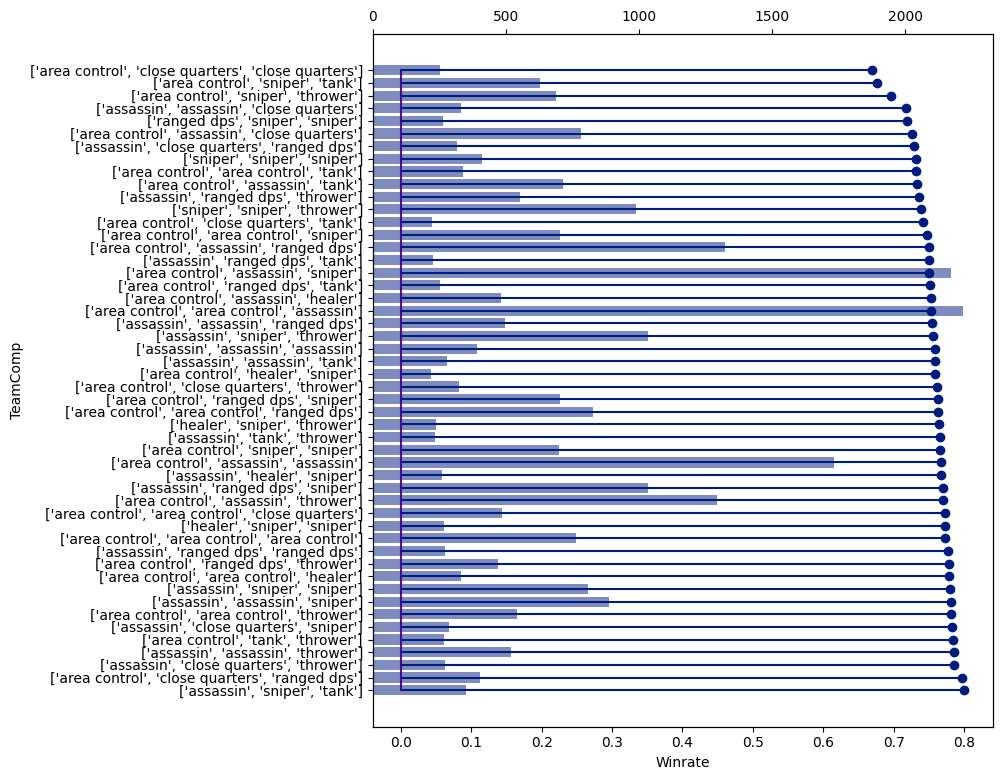

In [20]:
#grafico de teamcomp
teamCompTop = pivotTeamComp[0:50]

teamCompTop = teamCompTop.sort_values(by='winrate', ascending=False)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ay = plt.axes()

ay.stem(teamCompTop['teamcomp'], teamCompTop['winrate'], orientation='horizontal')

twin_axes = ay.twiny()

twin_axes.barh(teamCompTop['teamcomp'],teamCompTop['total_games'],alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('TeamComp')
twin_axes.set_ylabel('Total Usage')

# Muestra el gráfico
plt.show()

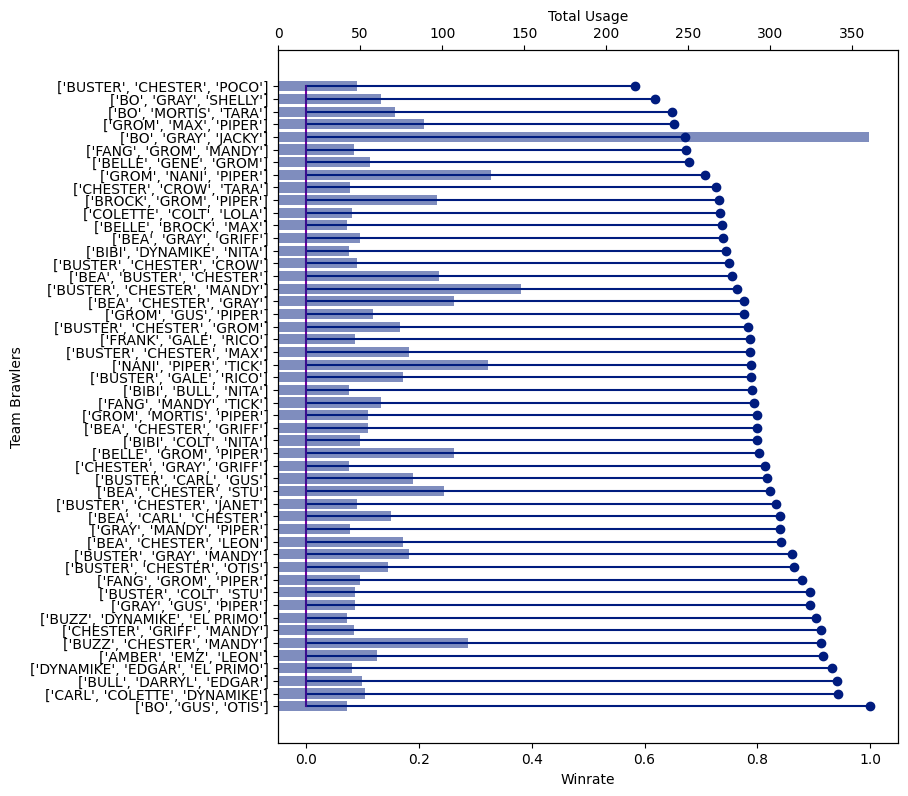

In [21]:
# gráfico por composicion de brawler en equipo
brawlerCompTop = pivotBrawlerComp[0:50]

brawlerCompTop = brawlerCompTop.sort_values(by='winrate', ascending=False)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ay = plt.axes()

ay.stem(brawlerCompTop['teambrawlers'],brawlerCompTop['winrate'], orientation='horizontal')

twin_axes = ay.twiny()

twin_axes.barh(brawlerCompTop['teambrawlers'],brawlerCompTop['total_games'],alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Team Brawlers')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()

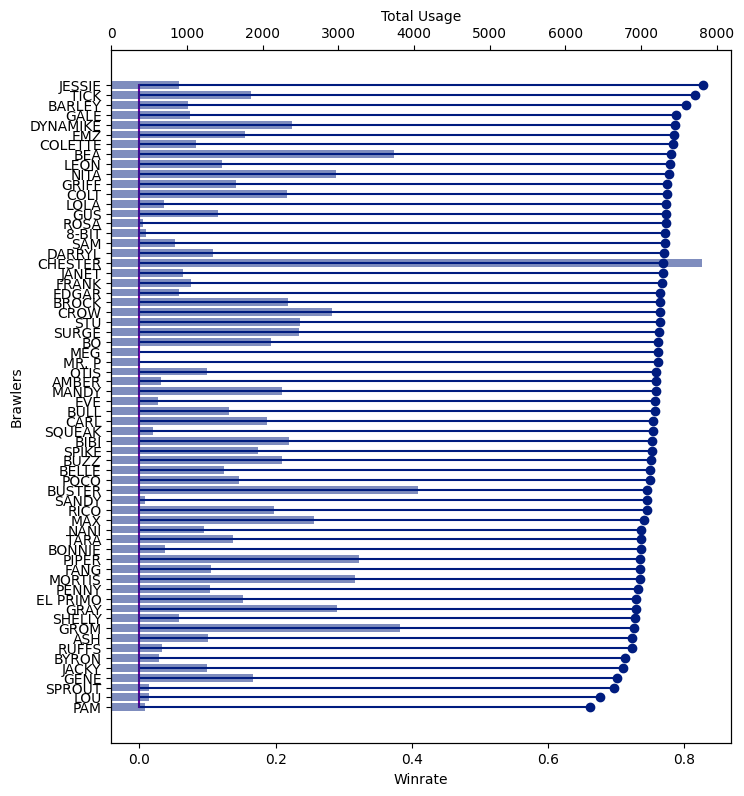

In [22]:
# gráfico por composicion de brawler en equipo

#PROBAR TRANSFORMANDO EJE Y A VALOR NUMÉRICO
brawlerTop = pivotBrawler[:]

brawlerTop = brawlerTop.sort_values(by='winrate', ascending=True)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ay = plt.axes()

ay.stem(brawlerTop['brawlername'], brawlerTop['winrate'], orientation='horizontal')

#plt.yticks(rotation=90)

twin_axes = ay.twiny()

twin_axes.barh(brawlerTop['brawlername'], brawlerTop['total_games'], alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Brawlers')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()

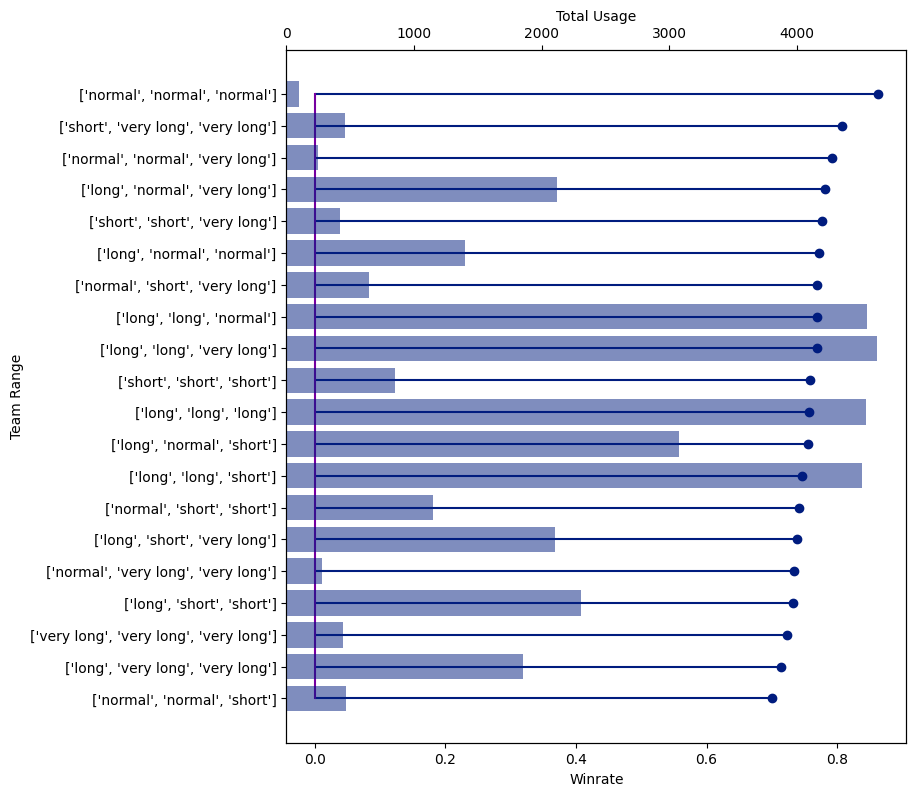

In [23]:
# gráfico por composicion de brawler en equipo
teamRange = pivotRange[:]

teamRange = teamRange.sort_values(by='winrate', ascending=True)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ay = plt.axes()

ay.stem(teamRange['teamrange'], teamRange['winrate'], orientation='horizontal')

#plt.yticks(rotation=90)

twin_axes = ay.twiny()

twin_axes.barh(teamRange['teamrange'], teamRange['total_games'], alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Team Range')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()